In [77]:
! pwd

/Users/Naaz/Documents/Projects/Python/GeoSpatialAnalysis


In [78]:
import pandas as pd

# https://www.kaggle.com/roshansharma/europe-datasets?select=work_hours_2016.csv
df = pd.read_csv("Input/work_hours_2016.csv")

In [79]:
df.dtypes

country            object
avg_hrs_worked    float64
dtype: object

In [81]:
df.head()

,country,avg_hrs_worked
0,Austria,36.5
1,Belgium,37.0
2,Bulgaria,40.8
3,Switzerland,34.7
4,Cyprus,39.2


In [82]:
#pip install geopandas

# Import necessary modules
import geopandas as gpd


# Set filepath
fp = "World/MyEurope.shp"

# Read file using gpd.read_file()
map_df = gpd.read_file(fp)

In [83]:
type(map_df)

geopandas.geodataframe.GeoDataFrame

In [84]:
print(map_df.head(2))

  FIPS_CNTRY GMI_CNTRY CNTRY_NAME SOVEREIGN  POP_CNTRY  SQKM_CNTRY  \
0         AL       ALB    Albania   Albania    3416945   28754.500   
1         AU       AUT    Austria   Austria    7755406   83738.852   

   SQMI_CNTRY  CURR_TYPE CURR_CODE LANDLOCKED COLOR_MAP  Pop2011CIA  \
0    11102.11        Lek       ALL          N         6     2906024   
1    32331.57  Schilling       ATS          Y         1     7971957   

   Pop2000Wik                                                url  \
0     3037098  https://www.cia.gov/library/publications/the-w...   
1     7944324  https://www.cia.gov/library/publications/the-w...   

                                            geometry  
0  POLYGON ((20.79192 40.43154, 20.78722 40.39472...  
1  POLYGON ((10.47124 46.87135, 10.48821 46.93599...  


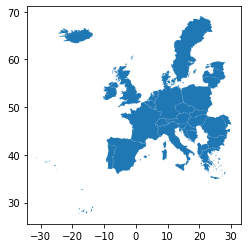

In [85]:
#pip install descartes

%matplotlib inline
map_df.plot()

In [86]:
import matplotlib.pyplot as plt

In [87]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('CNTRY_NAME').join(df.set_index('country'))

#merged=merged.dropna(subset = ['CC3'])
print(merged) 

                  FIPS_CNTRY GMI_CNTRY               SOVEREIGN  POP_CNTRY  \
CNTRY_NAME                                                                  
Albania                   AL       ALB                 Albania    3416945   
Austria                   AU       AUT                 Austria    7755406   
Belgium                   BE       BEL                 Belgium   10032460   
BosniaHerzegovina         BK       BIH  Bosnia and Herzegovina    2656240   
Bulgaria                  BU       BGR                Bulgaria    8943258   
Denmark                   DA       DNK                 Denmark    4667750   
Ireland                   EI       IRL                 Ireland    5015975   
Estonia                   EN       EST                 Estonia    1590808   
CzechRepublic             EZ       CZE          Czech Republic   10321120   
France                    FR       FRA                  France   57757060   
Germany                   GM       DEU                 Germany   81436300   

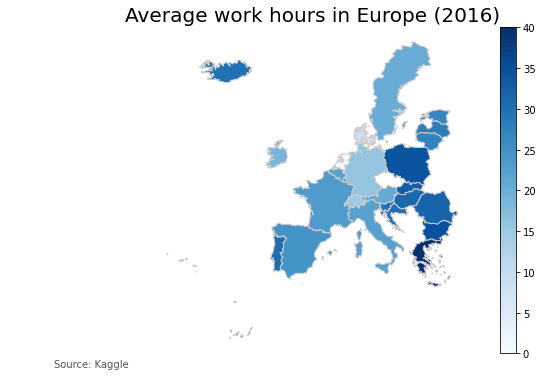

In [88]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'avg_hrs_worked'

# set the range for the choropleth
vmin, vmax = 0, 40

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=1, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Average work hours in Europe (2016)', \
              fontdict={'fontsize': '20',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: Kaggle',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap.png', dpi=300)